## The Kidney Exchange Problem

### A) Motivation. First approach.


**In order to familiarize ourselves with the kidney donor problem, we proceed to invent a statement and construct its Ising model.**

Let $D$ and $R$ be a list of donors and recipients, respectively.

**Objective function:** maximize the number of successful transplants. This is achieved by matching kidney donors and recipients in a way that maximizes the number of people receiving compatible kidneys.

**Compatibility constraints:**

1. **Blood group compatibility.** It is important to ensure the donor and the recipient have blood compatibility.

There are four main blood types: A, B, AB and O. Combination of proteins and sugars (antigens) on the surface of red blood cells are what make the blood type either compatible or incompatible with other blood types. Specifically:

- Type A blood can only receive type A or type O blood.

- Type B blood can only receive type B or type O blood.

- Type AB blood can receive all blood types.

- Type O blood can only receive type O blood.


2. **Immunological conmpatibility between donor and recipient (Human Leukocyte Antigens - HLA).** HLA compatibility is important to minimize the risk of organ rejection. In this work, we will consider that a donor can only be matched with a recipient if they have HLA compatibility or incompatibility at two specific sites, referred to as site $s_1$ and site $s_2$. At each site, there are two possible alleles, referred to as $a_1$ and $a_2$.

Let $S = \lbrace{s_1, s_2}\rbrace$ and $Alleles = \lbrace{a_1, a_2}\rbrace$.
For each site, let's define a binary variable $IC[i, j, s, a]$ to indicate whether donor $i$ and recipient $j$ has allele $a$ of the HLA at site $s$.

+ $IC[i, j, s, a] = 1$ if donor $i$ and recipient $j$ have allele $a$ compatibility at site $s$.

+ $IC[i, j, s, a] = 0$ if donor $i$ and recipient $j$ do not have compatibility at site $s$

3. **Antibody compatibility (Panel Reactive Antibodies Coefficient - CPRA).** The CPRA is a value that indicates the probability of finding a compatible donor based on the recipient's antibody presence. In particular, it ensures the minimization of the risk of organ rejection due to antibody incompatibility.

A CPRA of 0% means that the recipient has no detectable antibodies against any HLA antigens in the reference population, increasing the chances of finding a compatible donor. A CPRA of 100% means that the recipient has antibodies against all HLA antigens in the reference population, making it extremely difficult to find a compatible donor.

For each recipient $r \in R$, $$CPRA(r) \leq threshold_1,$$

where $threshold_1$ is the maximum acceptable value of CPRA for that recipient.
    
4. **Kidney size compatibility and age.** Both factors are important to determine if a kidney is suitable for a particular recipient.

Let's define a numerical variable to represent the age of each donor, $A(i)$, and each recipient, $A(j)$ and a variable to represent the size or volume of each kidney, both from the donor, $V(i)$, and from the recipient, $V(j)$.

+ The age difference between the donor and the recipient cannot exceed $10$ years.

$$|A(i)-A(j)| \leq 10$$

+ The donor's kidney size must be at least 80% of the recipient's kidney size.

$$V(i) \geq 0.8 · V(j)$$

5. **Immunosupression considerations.** Requirements related to the recipient's capacity to undergo immunosupressive therapy, necessary to prevent rejection of the transplanted organ.

Let's define a numerical variable to represent the recipient's capacity for immunosuppression tolerance, $DT(j)$. It must be ensured that such tolerance is equal to or greater than a certain threshold, $threshold_2$, to guarantee that the recipient can undergo immunosuppression therapy. Specifically:

$$DT(j) \geq threshold_2.$$

6. **Psychological evaluation.** This is considered to ensure that donors and recipients are mentally prepared for the transplantation process.

Let's define a binary variable to represent the result of the psychological evaluation for the donor, P(i), and for the recipient, P(j), such that:


+ If $P(i)·P(j) = 1$ they have passed the psychological evaluation.

+ If $P(i)·P(j) = 0$ they have not passed the psychological evaluation.

In [1]:
# Instala OpenQAOA
!pip install OpenQAOA
# Instala Qiskit Optimization, si aún no lo tienes
!pip install qiskit-optimization
# Instala Qiskit Algorithms, si aún no lo tienes
!pip install qiskit_algorithms

!pip install qiskit==0.44.1
!pip install azure-quantum[qiskit] --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 478.0/478.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.4/280.4 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.6/288.6 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 127.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.45.0
    Uninstalling qiskit-terra-0.45.0:
      Successfully uninstalled qiskit-terra-0.45.0
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.45.0
    Uninstalling qiskit-0.45.0:
      Successfully uninstalled qiskit-0.45.0
  Using cached azure_quantum-0.28.302812-py3-none-any.whl (180 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 47.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of qiskit to determine which version is compatible with other requirements. This could take a while.
  Using cached qiskit-0.45.0-py3-none-any.whl (9.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel 

**Given 1 donor and 1 recipient.**

In [2]:
import numpy as np

# Recipient = [blood_group, a_1, a_2, CPRA(recipient), age, kidney_size, 0, psy_eval]
# Donant = [blood_group, a_1, a_2, CPRA(donant), age, kidney_size, 0, psy_eval]

R = np.array(['A', '2', '1', 0.5, 43, 0.75, 0, 1])
D = np.array(['A', '2', '1', 0, 51, 0.80, 0.9, 1])

R_bin = np.zeros(8)

# For all elements in the position i in vector R and vector D check if they are equal.
# If so, put a 1 in position i of vector R_bin.

for i in [0, 1, 2, 7]:
    if R[i] == D[i]:
        R_bin[i] = 1
        #print(R_bin[0])

# CPRA

if R[3].astype(float) <= 0.5:
    R_bin[3] = 1
    print(R_bin)

# Kidney size and age

if abs(R[4].astype(float) - D[4].astype(float)).astype(float) <= 10:
    R_bin[4] = 1
    print(R_bin)

if R[5].astype(float) >= 0.8 * D[5].astype(float):
    R_bin[5] = 1
    print(R_bin)

if D[6].astype(float) >= 0.75:
    R_bin[6] = 1
    print(R_bin)

# This piece of code let us know if the donor and the recipient are compatibles.

R_value = 0

if R_bin.all() == np.ones(8).all():
    R_value = 1

print(R_value)




[1. 1. 1. 1. 0. 0. 0. 1.]
[1. 1. 1. 1. 1. 0. 0. 1.]
[1. 1. 1. 1. 1. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1.]
1


**Given _n_ donors and _m_ recipients.**

In [3]:
import numpy as np

def compatibility_check(R, D):
    R_bin = np.zeros(8)

    for i in [0, 1, 2, 7]:
        if str(R[i]) == str(D[i]):
            R_bin[i] = 1

    if float(R[3]) <= 0.5:
        R_bin[3] = 1

    if abs(float(R[4]) - float(D[4])) <= 10:
        R_bin[4] = 1

    if float(R[5]) >= 0.8 * float(D[5]):
        R_bin[5] = 1

    if float(D[6]) >= 0.75:
        R_bin[6] = 1

    if R_bin.all() == np.ones(8).all():
        return 1
    else:
        return 0

# Lista de listas R
list_R = [['A', '2', '1', 0.5, 43, 0.75, 0, 1], ['B', '3', '2', 0.6, 50, 0.80, 0.7, 1], ['A', '2', '1', 0.5, 45, 0.70, 0.5, 0]]

# Lista de listas D
list_D = [['A', '2', '1', 0, 51, 0.80, 0.9, 1], ['B', '2', '3', 0.2, 40, 0.85, 0.95, 0], ['A', '2', '1', 0.2, 48, 0.75, 0.8, 1]]

results = []

for R in list_R:
    for D in list_D:
        result = compatibility_check(R, D)
        results.append(result)

results = [results[i:i + len(list_D)] for i in range(0, len(results), len(list_D))]

print(results)


[[1, 0, 1], [0, 0, 0], [0, 0, 0]]


### Mathematical expression for constraints and objective function

Suppose there are _n_ kidney donors and _m_ kidney recipients.
Let's define the following binary variables, such that

$x_{ij} = 1$ means that donor i is assigned to recipient j,

$x_{ij} = 0$ otherwise.

+ **Objective function.**

The objective function aims to maximize the compatibility between donors and recipients, which can be expressed as the sum of individual compatibilities as follows,

$$
max \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} Compatibility_{ij} · x_{ij}
$$

where $Compatibility_{ij}$ is a measure of compatibility between donor i and recipient j, which corresponds exactly to element j in the i-th list of _results_.

(i.e. $Compatibility_{ij}$ = _results[i][j]_)

Then,

$$
H_{objective} = - \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} Compatibility_{ij} · x_{ij}
$$

+ **Unique assignment constraint (Each donor is assigned to one recipient, and vice versa).**

$$\sum_{j=0}^{m-1} x_{ij} \leq 1$$

$\forall i\in{0, ..., n-1}$ and

$$\sum_{i=0}^{n-1} x_{ij} \leq 1$$

$\forall j\in{0, ..., m-1}.$

Therefore,

$$
H_{uniqueness} = \sum_{i=0}^{n-1}(\sum_{j=0}^{m-1} x_{ij} - 1)^2 + \sum_{j=0}^{m-1}(\sum_{i=0}^{n-1} x_{ij} - 1)^2
$$

So that,

$$
H_{total} = - \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} Compatibility_{ij} · x_{ij} + \sum_{i=0}^{n-1}(\sum_{j=0}^{m-1} x_{ij} - 1)^2 + \sum_{j=0}^{m-1}(\sum_{i=0}^{n-1} x_{ij} - 1)^2
$$

### B) Practical exercise implemented using openqaoa.

**Next, using the article https://doi.org/10.1007/978-3-031-06668-9_21 as a resource, we implement the kidney transplant problem by applying the stable marriage algorithm adapted to the context in which we find ourselves.**

In [4]:
#Define preference matrix of the first set
#m[i] represents individuals from the second set with preferences, from highest to lowest, of individual i from set m
m = [[2,1], [2,3,1], [0,2,1,3], [1,2,0]]

#Preferences of the second set
w = [[1,3,0], [0,1], [2,3,0,1], [2,1]]

#Initialize list of admitted pairs
couples = []

#Iterate over members of the first set
for i in range(4):
    # Select indices from the preference list of that individual and check for reciprocity
    for j in range(len(m[i])):
        if i in w[m[i][j]]:
            # Individual i from set 1 is in the preferences of individual j from set 2
            couples.append([i, m[i][j]])

print(couples)

#Each variable will correspond to a pair from the couples list
#In other words, variable x_i will correspond to the pair with index i in the list
n_variables = len(couples)

[[0, 2], [0, 1], [1, 2], [1, 3], [1, 1], [2, 2], [2, 3], [3, 2], [3, 0]]


In [5]:
#The way to call the QUBO class from openqaoa.problems will be, for example, for 3x_0 + 2x_1 + 6x_0x_1 + 4x_1x_2
#qubo = QUBO(n=3, terms=[[0],[1], [0,1], [1,2]], weights=[3, 2, 6, 4])
#Initialize the coefficients and linear terms of the objective function
#C(x) = -x_0 - x_1 - ... - x_{n_variables-1}
#Therefore, the coefficients will be [-1,-1,-1,-1,...,-1] and the variables [[0],[1],...,[n_variables-1]]
coefficients = [-1 for i in range(n_variables)]
variables = [[i] for i in range(n_variables)]

print(coefficients)
print(variables)

[-1, -1, -1, -1, -1, -1, -1, -1, -1]
[[0], [1], [2], [3], [4], [5], [6], [7], [8]]


In [6]:
# First constraint: No one can be paired twice

# Penalty term, which we'll call p3
# n**2 + p1 where n is the size of both sets
n = len(m)
p3 = n**2 + 1

# For each x_i, check if the rest of x_j share any component
for i in range(n_variables):
    # Ensure that the same pairs of variables are not repeated with the order changed
    for j in range(i+1, n_variables):
        if couples[i][0] == couples[j][0] or couples[i][1] == couples[j][1]:
            coefficients.append(p3)
            variables.append([i, j])

print(variables)
print(coefficients)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [0, 1], [0, 2], [0, 5], [0, 7], [1, 4], [2, 3], [2, 4], [2, 5], [2, 7], [3, 4], [3, 6], [5, 6], [5, 7], [7, 8]]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]


In [7]:
# Second constraint: Stability.
# We will aim to penalize the existence of pairs where both individuals prefer to be together rather than with their assigned partners,
# and favor those that can be more stable.

# Penalty term p2 = n, where n is the size of each of the two sets
p2 = n

# For each possible pair, look for cases where one of the two prefers another individual with whom they can be paired
for k, l in couples:
    # Initialize a list of other pairs with individual k from the first set
    alternatives1 = []
    # List of other possible pairs for individual l from the second set
    alternatives2 = []
    for i, j in couples:
        # Look for other possible pairs of individual k from the first set and compare the order of preference with that of individual l
        if i == k and j != l and m[k].index(j) < m[k].index(l):
            coefficients.append(-p2)
            variables.append([couples.index([k, j])])
            alternatives1.append(couples.index([k, j]))
        if i != k and j == l and w[l].index(i) < w[l].index(k):
            coefficients.append(-p2)
            variables.append([couples.index([i, l])])
            alternatives2.append(couples.index([i, l]))
    # Penalize pairs that may break the pairing
    for alternative1 in alternatives1:
        for alternative2 in alternatives2:
            coefficients.append(p2)
            variables.append([alternative1, alternative2])

print(variables)
print(coefficients)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [0, 1], [0, 2], [0, 5], [0, 7], [1, 4], [2, 3], [2, 4], [2, 5], [2, 7], [3, 4], [3, 6], [5, 6], [5, 7], [7, 8], [5], [7], [0], [0], [5], [7], [2], [6], [2, 6], [1], [2], [3], [2, 1], [3, 1], [5], [5], [7]]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, -4, -4, -4, -4, -4, -4, -4, -4, 4, -4, -4, -4, 4, 4, -4, -4, -4]


In [ ]:
#!pip install openqaoa

In [8]:
from openqaoa.problems import QUBO

# Create a QUBO instance with the specified variables and coefficients
qubo = QUBO(n=n_variables, terms=variables, weights=coefficients)

# Print the QUBO Hamiltonian (coefficients need to be changed to correspond to an Ising model)
print(qubo.hamiltonian)

# Convert the QUBO to an Ising model
qubo.terms, qubo.weights = qubo.convert_qubo_to_ising(n_variables, variables, coefficients)


The qiskit module has not been installed.
No module named 'qiskit.circuit.classical'
The azure module has not been installed.
No module named 'qiskit.circuit.classical'
-9.0*Z_{0} + -5.0*Z_{1} + -9.0*Z_{2} + -5.0*Z_{3} + -1.0*Z_{4} + -17.0*Z_{5} + -5.0*Z_{6} + -13.0*Z_{7} + -1.0*Z_{8} + 17.0*Z_{0}Z_{1} + 17.0*Z_{0}Z_{2} + 17.0*Z_{0}Z_{5} + 17.0*Z_{0}Z_{7} + 17.0*Z_{1}Z_{4} + 17.0*Z_{2}Z_{3} + 17.0*Z_{2}Z_{4} + 17.0*Z_{2}Z_{5} + 17.0*Z_{2}Z_{7} + 17.0*Z_{3}Z_{4} + 17.0*Z_{3}Z_{6} + 17.0*Z_{5}Z_{6} + 17.0*Z_{5}Z_{7} + 17.0*Z_{7}Z_{8} + 4.0*Z_{2}Z_{6} + 4.0*Z_{1}Z_{2} + 4.0*Z_{1}Z_{3} + 0


In [9]:
print(qubo.hamiltonian)  # Now the Hamiltonian is correct


4.25*Z_{0}Z_{1} + 4.25*Z_{0}Z_{2} + 4.25*Z_{0}Z_{5} + 4.25*Z_{0}Z_{7} + 4.25*Z_{1}Z_{4} + 4.25*Z_{2}Z_{3} + 4.25*Z_{2}Z_{4} + 4.25*Z_{2}Z_{5} + 4.25*Z_{2}Z_{7} + 4.25*Z_{3}Z_{4} + 4.25*Z_{3}Z_{6} + 4.25*Z_{5}Z_{6} + 4.25*Z_{5}Z_{7} + 4.25*Z_{7}Z_{8} + 1.0*Z_{2}Z_{6} + 1.0*Z_{1}Z_{2} + 1.0*Z_{1}Z_{3} + -12.5*Z_{0} + -8.0*Z_{1} + -18.75*Z_{2} + -11.25*Z_{3} + -12.25*Z_{4} + -8.5*Z_{5} + -7.0*Z_{6} + -10.5*Z_{7} + -3.75*Z_{8} + 30.0


In [10]:
hamiltonian = qubo.hamiltonian

# Import the brute-force solver to obtain the exact solution
from openqaoa.utilities import ground_state_hamiltonian
energy, configuration = ground_state_hamiltonian(hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")


Ground State energy: -24.0, Solution: ['010101001']


In [11]:
solution_pairs = []
for i in range(n_variables):
    if configuration[0][i] == "1":
        solution_pairs.append(couples[i])

print(solution_pairs)


[[0, 1], [1, 3], [2, 2], [3, 0]]


In [ ]:
#[[0, 1], [1, 3], [2, 2], [3, 0]] is the correct solution

In [ ]:
#from openqaoa import QAOA
#q = QAOA()

from openqaoa.backends import create_device

for optimizer in ["Nelder-Mead", "BFGS", "COBYLA", "SLSQP"]:
    for k in range(1, 30):
        q = QAOA()

        device = create_device(location='local', name='vectorized')
        q.set_device(device)

        # Circuit properties
        q.set_circuit_properties(p=k, param_type='standard', init_type='rand', mixer_hamiltonian='x')

        # Backend properties (already set by default)
        q.set_backend_properties(prepend_state=None, append_state=None)

        # Classical optimizer properties
        q.set_classical_optimizer(method=optimizer,
                                  maxiter=500, tol=0.001,
                                  optimization_progress=True, cost_progress=True, parameter_log=True)
        q.compile(qubo)
        q.optimize()
        results = q.result

        solution = results.most_probable_states["solutions_bitstrings"][0]
        solution_pairs = []
        for i in range(n_variables):
            if solution[i] == "1":
                solution_pairs.append(couples[i])
        print(optimizer, k, solution, solution_pairs)


In [ ]:
for optimizer in ["COBYLA", "SLSQP"]:
    for k in range(1, 30):
        q = QAOA()

        device = create_device(location='local', name='vectorized')
        q.set_device(device)

        # Circuit properties
        q.set_circuit_properties(p=k, param_type='standard', init_type='rand', mixer_hamiltonian='x')

        # Backend properties (already set by default)
        q.set_backend_properties(prepend_state=None, append_state=None)

        # Classical optimizer properties
        q.set_classical_optimizer(method=optimizer,
                                  maxiter=500, tol=0.001,
                                  optimization_progress=True, cost_progress=True, parameter_log=True)
        q.compile(qubo)
        q.optimize()
        results = q.result

        solution = results.most_probable_states["solutions_bitstrings"][0]
        solution_pairs = []
        for i in range(n_variables):
            if solution[i] == "1":
                solution_pairs.append(couples[i])
        print(optimizer, k, solution, solution_pairs)


In [14]:
from openqaoa.backends import create_device
from openqaoa import QAOA

q = QAOA()

qiskit_device = create_device(location='local', name='vectorized')
q.set_device(qiskit_device)

# circuit properties
q.set_circuit_properties(p=13, param_type='standard', init_type='rand', mixer_hamiltonian='x')

# backend properties (already set by default)
q.set_backend_properties(prepend_state=None, append_state=None)

# classical optimizer properties
q.set_classical_optimizer(method='SLSQP',
                        maxiter=500, tol=0.001,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

In [15]:
q.compile(qubo)
q.optimize()

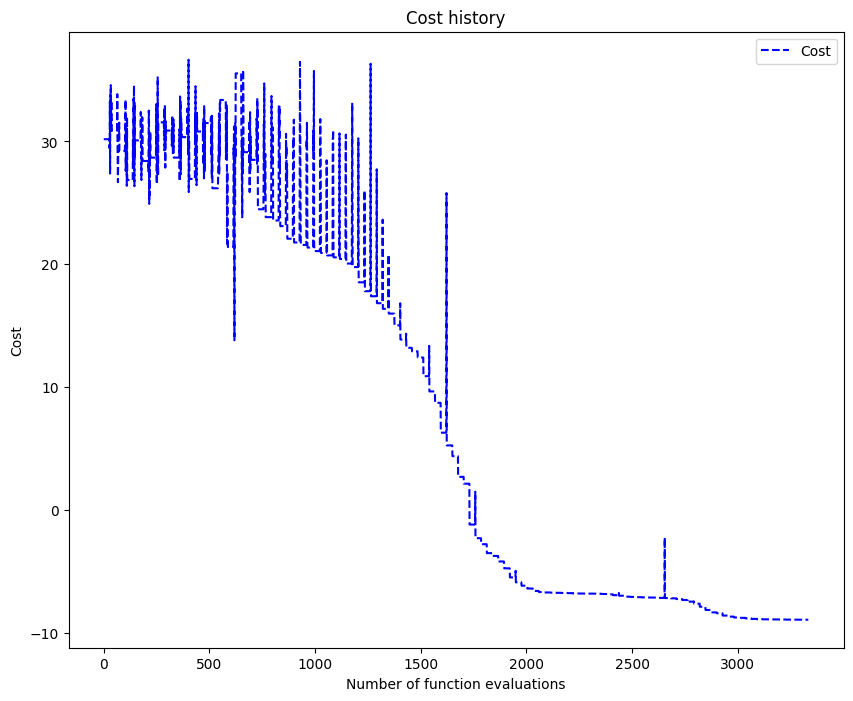

In [16]:
results = q.result
results.plot_cost()

In [17]:
print(results.most_probable_states)

{'solutions_bitstrings': ['010000110'], 'bitstring_energy': -23.0}


In [18]:
solution = results.most_probable_states["solutions_bitstrings"][0]
solution_pairs = []
for i in range(n_variables):
    if solution[i] == "1":
        solution_pairs.append(couples[i])


In [19]:
print(solution_pairs)

[[0, 1], [2, 3], [3, 2]]
